In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
import sys
from pathlib import Path

sys.path.append(str(Path(".").resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
from scripts.experiments import InputOutput
io = InputOutput()

In [116]:
seq, seg = io.read_nrrds("../MRI_data/ROI/DWI")

In [117]:
seq_header, seq_vol = io.nrrd_to_matrix(seq)
seg_header, seg_vol = io.nrrd_to_matrix(seg)

In [118]:
def fix_volume_shape(volume):
    """
    This module fixes the shape of a volume if there is a transposed image.
    Sometimes this happens for the DWI sequence.
    """
    if volume.shape[0] == 128 and volume.shape[1] == 104:
        volume = np.transpose(volume, (1, 0, 2))
    return volume

# Example: assuming `volumes` is a list of your arrays
seq_vol = [fix_volume_shape(vol) for vol in seq_vol]
seg_vol = [fix_volume_shape(vol) for vol in seg_vol]

In [119]:
seq_vol = np.concatenate(seq_vol, axis=2)
seg_vol = np.concatenate(seg_vol, axis=2)

In [120]:
seg_vol.shape, seq_vol.shape

((104, 128, 570), (104, 128, 570))

### Visualization of segmentation by pseudo rgb encoding

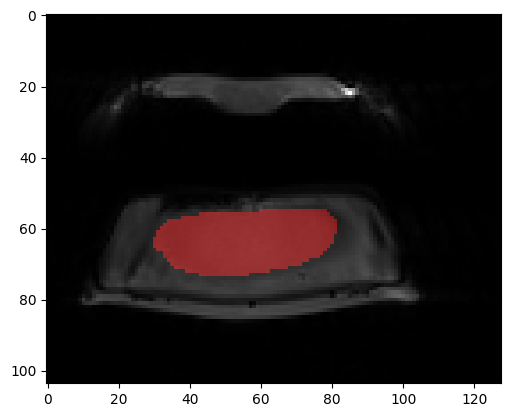

In [121]:
slc = 12
vs = seg_vol[:, :, slc]
v = seq_vol[:, :, slc]
v = v / v.max()

rgb = np.stack((v+vs*0.4, v, v), axis=-1)
plt.imshow(rgb)
plt.show()

In [122]:
def animation_from_array(seq=None, seg=None):
    """
    Function takes images files from array and converts them to an animation object
    """

    imgs = []
    fig, ax = plt.subplots()

    for i in range(seq.shape[2]):
        arr = seq[:,:,i]
        arr = arr/arr.max()
        s = seg[:,:,i]
        rgb = np.stack((arr+s*0.3, arr, arr), axis=-1)
        im = ax.imshow(rgb, animated = True, cmap="grey")
        imgs.append([im])

    ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True,
                                    repeat_delay=1000)
    return ani

# ani = animation_from_array(seq=seq_vol, seg=seg_vol)
# ani.save("DWI_segmentations.mp4")
# ani